# Adversarial Example on MNIST (Manual Perturbation)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 1 = filter INFO, 2 = filter WARNING, 3 = filter ERROR

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
# Load and normalize MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
y_train_cat = to_categorical(y_train, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Build and train a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=3, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8770 - loss: 0.4376
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9633 - loss: 0.1238
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9760 - loss: 0.0795


In [6]:
# Select a test image and make a prediction
idx = 0
original_image = x_test[idx]
true_label = y_test[idx]
original_pred = np.argmax(model.predict(original_image[np.newaxis]), axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [18]:
# Manually perturb the image
modified_image = original_image.copy()
# modified_image[14, 5:23, 0] = 1.0
# modified_image[13:16, 5:23, 0] = 1.0
# modified_image[5:23, 13:15, 0] = 0.9
# modified_image[0:15, :, 0] = 0.0

# Add several bright pixels randomly (simulating ink blot or dust)
for _ in range(300):  # increase for stronger effect
    x = random.randint(1, 27)
    y = random.randint(1, 27)
    modified_image[y-1:y, x-1:x, 0] = 0.3  # small blot

In [19]:
# Predict again after the modification
modified_pred = np.argmax(model.predict(modified_image[np.newaxis]), axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


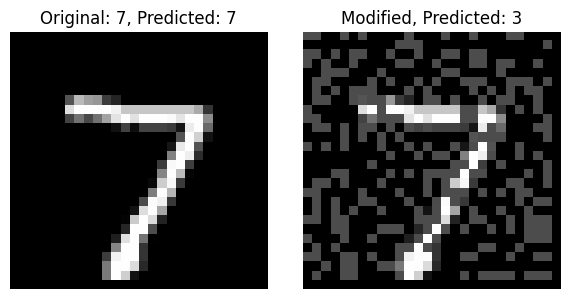

In [20]:
# Plot the original and modified images with predictions
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(original_image.squeeze(), cmap="gray")
axs[0].set_title(f"Original: {true_label}, Predicted: {original_pred}")
axs[0].axis("off")

axs[1].imshow(modified_image.squeeze(), cmap="gray")
axs[1].set_title(f"Modified, Predicted: {modified_pred}")
axs[1].axis("off")
plt.tight_layout()
plt.show()